In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv(r"A:\my_codes\my_project\Machine Learning\Supervised Machine Learning\Regression\Lasso Regression\Medical Insurance Cost Prediction\insurance.csv", encoding='unicode_escape')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [108]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='str')

In [109]:
df['sex'].unique()

<ArrowStringArray>
['female', 'male']
Length: 2, dtype: str

In [110]:
df['smoker'].unique()

<ArrowStringArray>
['yes', 'no']
Length: 2, dtype: str

In [111]:
df['region'].unique()

<ArrowStringArray>
['southwest', 'southeast', 'northwest', 'northeast']
Length: 4, dtype: str

In [112]:
df['sex'] = df['sex'].map({'Male':1, 'Female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'northeast':1, 'northwest':2, 'southeast':3, 'southwest':4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,1,4,16884.92400
1,18,NaN,33.770,1,0,3,1725.55230
2,28,NaN,33.000,3,0,3,4449.46200
3,33,NaN,22.705,0,0,2,21984.47061
4,32,NaN,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,NaN,30.970,3,0,2,10600.54830
1334,18,NaN,31.920,0,0,1,2205.98080
1335,18,NaN,36.850,0,0,3,1629.83350
1336,21,NaN,25.800,0,0,4,2007.94500


In [113]:
isnull = df.isnull().sum()
isnull

age            0
sex         1338
bmi            0
children       0
smoker         0
region         0
charges        0
dtype: int64

In [114]:
df['sex'].fillna(0, inplace=True)
df['smoker'].fillna(0, inplace=True)
df['region'].fillna(0, inplace=True)
df.isnull().sum()

C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_11108\1104445890.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['sex'].fillna(0, inplace=True)
C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_11108\1104445890.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment usin

age            0
sex         1338
bmi            0
children       0
smoker         0
region         0
charges        0
dtype: int64

In [115]:
df['sex'] = df['sex'].fillna(0).astype("int64")


In [116]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,1,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,4,2007.94500


In [117]:
X = df[['age','sex','bmi', 'children', 'smoker', 'region']]
Y = df['charges']

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [119]:
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000)
lasso_cv.fit(X_train.fillna(X_train.median()), Y_train)
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

Best alpha: 8.286427728546842


In [120]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=best_alpha))
])

In [121]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,2
1285,47,0,24.320,0,0,1
1142,52,0,24.860,0,0,3
969,39,0,34.320,5,0,3
486,54,0,21.470,3,0,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,1
1130,39,0,23.870,5,0,3
1294,58,0,25.175,0,0,1
860,37,0,47.600,2,1,4


In [122]:
Y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [123]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
Y_pred

a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.996e+07, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


array([10522.08005733,  6363.29702827, 34197.54715641, 10938.27510924,
       29605.26830383,  4619.23033851,  2940.77502719, 15756.93182005,
        3219.23007645, 12206.96762041, 20372.48152921,  9439.0619972 ,
        5371.68620591, 50143.67039081, 52813.29788335, 45904.37588472,
       10541.37727564, 42536.60528865,  9607.64021394, 26629.5058853 ,
        4592.18834827,  8955.8589827 ,  2584.65787061,  4798.18046155,
       12468.26642712, 12021.43257562, 14274.96653522,  7229.70821832,
       11313.61184096,  2918.52021896,  8393.36732123, 12881.35685674,
        3113.07443981,  6241.34375811,  4361.48177079,  9218.62186722,
        3535.58633371,  8604.25138529, 25689.73618458, 37394.09537511,
        4034.88789592,  5073.07224152, 13076.25133462, 13141.76322092,
        6737.48257647, 14597.15410772,  5883.39821684,  4725.64074335,
       40687.06058706,  6104.59101363, 15367.25143008,  3773.45771192,
        8050.29126854,  3998.96223955, 12461.67244187, 12860.65380946,
      

In [124]:
X_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,1
887,36,0,30.020,0,0,2
890,64,0,26.885,0,1,2
1293,46,0,25.745,3,0,2
259,19,0,31.920,0,1,2
...,...,...,...,...,...,...
109,63,0,35.090,0,1,3
575,58,0,27.170,0,0,2
535,38,0,28.025,1,0,1
543,54,0,47.410,0,1,3


In [125]:
Y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [126]:
y_pred = pipeline.predict(X_test)
print("R²:", r2_score(Y_test, y_pred))

R²: 0.8683806758139883


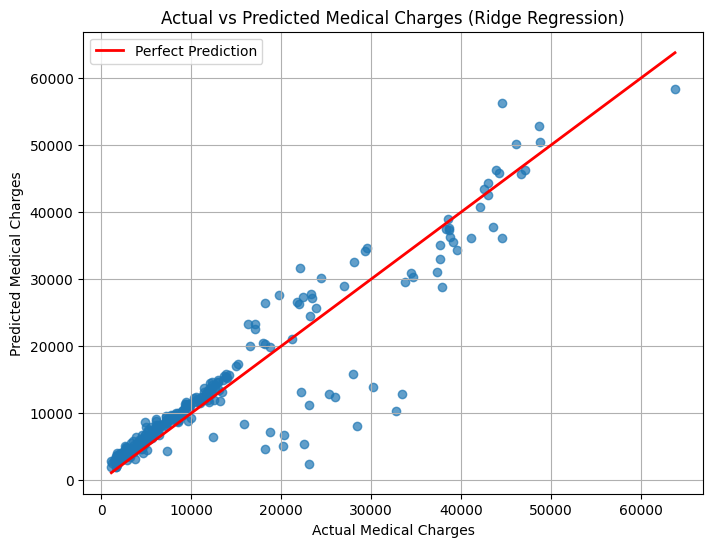

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.7)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction'
)
plt.xlabel("Actual Medical Charges")
plt.ylabel("Predicted Medical Charges")
plt.title("Actual vs Predicted Medical Charges (Ridge Regression)")
plt.legend()
plt.grid(True)
plt.show()